In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline  

## Work with data bundled in the Project
First, let's load a small Excel spreadsheet containing "Income Per Person" by country. "Income per person" is computed as the Gross Domestic Product (GDP) per person, adjusted for differences in purchasing power. Details on this particular dataset can be found [here](https://www.gapminder.org/data/documentation/gd001/).

Note, the spreadsheet `income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx` has been bundled in this project directly. It is versioned for you automatically using git-lfs, and any changes will be captured. It's available in the `input` section of the project. 

Here, we use relative paths to help with portability of the project.

In [2]:
income_file = '../input/income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx'
income_dataframe = pd.read_excel(open(income_file, 'rb'), sheet_name='income_per_person_gdppercapita_')

Next, pull out the income per person from 1950 to 2018, sorted by 2018, and look at the top 15 countries

In [3]:
income_dataframe = income_dataframe.sort_values(by=[2018], ascending=False)
num_rows = len(income_dataframe.index)
income_dataframe = income_dataframe.drop(range(1800,1950),axis=1)
income_dataframe = income_dataframe.drop(range(2019,2041),axis=1)
income_dataframe[:15]

country   1950   1951   1952   1953   1954   1955   1956  \
138                 Qatar   1600   1940   2450   3080   3880   4880   6150   
97             Luxembourg  18900  17600  18600  19200  18900  19600  20500   
150             Singapore   5030   4760   3310   3960   4550   4200   4630   
24                 Brunei  56600  57500  58500  59500  60500  61600  62600   
88                 Kuwait   4430   5710   7350   9450  10500  11600  12800   
182  United Arab Emirates   1210   1220   1220   1230   1240   1240   1250   
79                Ireland   6200   6370   6560   6760   6850   7090   7060   
126                Norway  11400  11900  12300  12600  13200  13400  14000   
111                Monaco  11100  11600  12100  12600  13200  13800  14400   
167           Switzerland  20400  21800  21600  22100  23000  24300  25500   
184         United States  15300  16200  16500  17000  16600  17400  17400   
3                 Andorra   6980   7550   8160   8830   9540  10300  11200   
145          Saudi Arabia   2310   2680   3110   3610   4190   4860   5640   
120           Netherlands   9460   9540   9580  10300  10900  11500  11900   
166                Sweden  12000  11900  12100  12200  12900  13200  13600   

      1957   1958  ...    2009    2010    2011    2012    2013    2014  \
138   7740   9750  ...  117000  125000  129000  125000  123000  121000   
97   21700  21700  ...   89100   91700   92000   89500   91000   93800   
150   4120   4140  ...   63700   72100   75000   76000   78500   80300   
24   63700  64800  ...   79500   80600   82400   82000   79100   76100   
88   14200  15700  ...   81900   75200   77500   77600   74100   70800   
182   1260   1410  ...   61100   57600   58400   59800   62500   64100   
79    7100   7030  ...   45000   45700   45500   44900   45300   48900   
126  14300  14200  ...   62700   62300   62100   62900   62800   63300   
111  15000  15700  ...   53700   54100   58100   58100   57900   58300   
167  26100  25100  ...   54500   55500   55900   55900   56300   56700   
184  17400  17000  ...   48600   49400   49800   50500   51000   51800   
3    12100  13000  ...   41700   39000   42000   41900   43700   44900   
145   6550   7600  ...   44500   45400   48500   49700   49500   50000   
120  12100  11800  ...   45100   45500   46100   45400   45200   45700   
166  14000  14000  ...   40900   42900   43800   43300   43500   44200   

       2015    2016    2017    2018  
138  120000  118000  120000  121000  
97    95300   97000   98100   99000  
150   80900   81400   82600   83900  
24    74600   71800   71300   76900  
88    69300   67300   67700   68400  
182   66000   67100   67700   68200  
79    60900   62800   64300   65600  
126   63700   63800   64200   64800  
111   58800   59500   60100   60700  
167   56500   56600   56900   57100  
184   52800   53300   54200   54900  
3     46600   48200   49800   51500  
145   50700   50500   50100   50100  
120   46400   47100   47900   48500  
166   45500   46400   47000   47500  

[15 rows x 70 columns]

## Plot some data and explore automatic versioning

Using a library like matplotlib, we can create a figure. This is automatically captured by the Gigantum Client and extracted for reference later.

Run this cell below and then switch back to the Gigantum Client tab in your browser. In the "Activity" section, you should see a new version created and the figure below captured!

Try changing `number_to_plot` to 5 and re-run the cell. You'll see the figure is captured again.

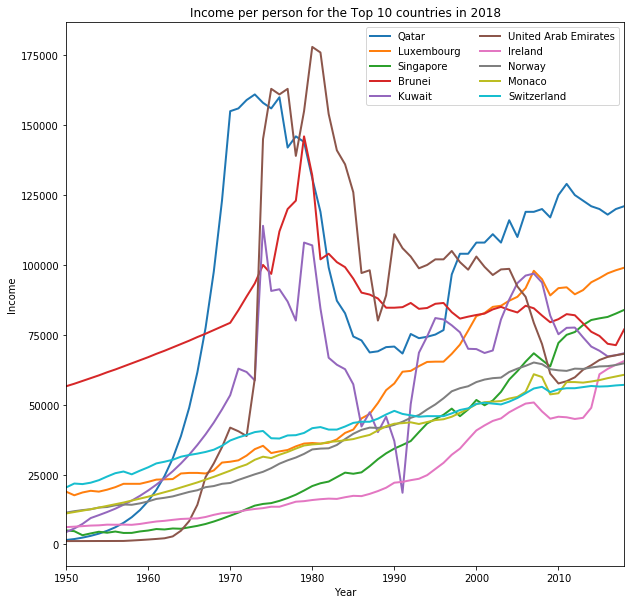

In [4]:
number_to_plot = 10

fig = plt.figure(figsize=(10,10))
ax = plt.gca()
palette = plt.get_cmap('tab10')

for idx in range(0, number_to_plot):
    row = income_dataframe.iloc[idx]    
    country = row['country']
    row = row.drop('country')
    row.plot(marker='', color=palette(idx), linewidth=2, label=country, ax=ax)

plt.xlabel("Year")
plt.ylabel("Income")
plt.title("Income per person for the Top 10 countries in 2018")
plt.legend(loc=1, ncol=2);
xmin, xmax, ymin, ymax = plt.axis();

Automatically versioning is great, but sometimes you don't want to save a figure because it is sensitive or just not important. You can add special comments to a cell and the Client will change how activity is captured:

- `gtm:ignore` - The client will create a version, but NO activity will be captured
- `gtm:hide` - The client will create a version and capture activity, but it will be considered "unimportant" and displayed collapsed
- `gtm:show` - The client will create a version and capture activity, and it will be considered "important" and displayed expanded

Let's try another figure, but ignore it! If you check the Activity feed after running this cell, you'll see a new version, but no figure is saved.

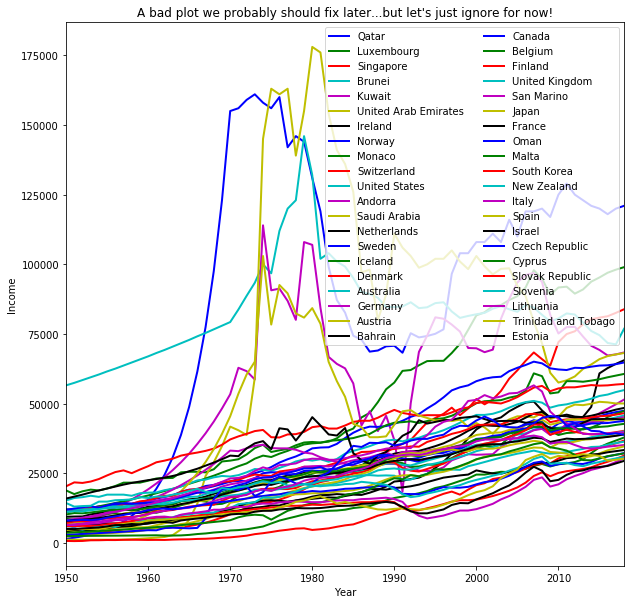

In [5]:
#gtm:ignore
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
cyc = cycler(color='bgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmyk')

for idx, cycle_args in zip(range(0, 100), cyc):
    row = income_dataframe.iloc[idx]
    country = row['country']
    row = row.drop('country')
    row.plot(marker='', linewidth=2, label=country, ax=ax, **cycle_args)

plt.xlabel("Year")
plt.ylabel("Income")
plt.title("A bad plot we probably should fix later...but let's just ignore for now!")
plt.legend(loc=1, ncol=2);
xmin, xmax, ymin, ymax = plt.axis();

## Accessing more data through Gigantum Datasets
Sometimes data gets large or worth sharing on its own. These are good scenarios to use Gigantum Datasets. This project has a Dataset that contains a large large CSV file (it's about 195MB) that contains the results from Stack Overflow's 2018 Developer Survey. 

If you simply opened this notebook and ran all cells to this point, you'll notice that data is missing! This is because Gigantum Datasets let you choose when you download data and what you download:

- Navigate back over the the Gigantum Client tab
- Go to the "Input" section
- Click on the "Download All" button (looks like an arrow pointing down) or open the dataset and download the `survey_results_public.csv` file.

Once this is complete, you should now be able to see the data in the Project. Dataset files get linked into Projects at container start time. You can see that the Dataset's files are available in a folder with the same name as the dataset in the `input` section.

In [6]:
stackoverflow_file = '../input/stack-overflow-dev-survey-18/survey_results_public.csv'
result_data = pd.read_csv(open(stackoverflow_file, 'rt'));

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


With both files loaded, let's combine the two datasets into an interesting figure. First, pull out the salary data for all users while dropping any data that is missing or 0. The `ConvertedSalary` field takes care of normalizing responses to US dollars and 40 hour work week year round.

In [7]:
result_data = result_data.dropna(subset=['Salary', 'SalaryType', 'ConvertedSalary'])
result_data = result_data[(result_data != 0).all(1)]
result_data = result_data[['Country', 'Salary','SalaryType', 'ConvertedSalary']]

Next, group by the number of responses to the survey by each country and grab the top 25 countries.

In [8]:
response_counts = result_data.groupby('Country').count()
response_counts = response_counts.sort_values(by=['ConvertedSalary'], ascending=False)
response_counts = response_counts[:25]

Group the data again by Country and compute the median salary

In [9]:
median_salary = result_data.groupby('Country').median()

Finally, combine the Income per person for each country with the median developer salary from the survey and number of responses.

In [10]:
country_median_dev_by_gdppp = list()
income_file = '../input/income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx'
df = pd.read_excel(open(income_file, 'rb'), sheet_name='income_per_person_gdppercapita_')

salary_data = list()
income_data = list()
country_data = list()
response_count_data = list()
for idx in range(0,25):
    country = response_counts.index[idx]
    salary = median_salary.loc[country]['ConvertedSalary']
    count = response_counts.loc[country][0]
    
    if country == "Russian Federation":
        country = "Russia"
        
    gdppp = df.loc[df['country'] == country, 2018]
    if not gdppp.empty:
        gdppp = gdppp.iloc[0]
    else:
        gdppp = None
        
    response_count_data
    salary_data.append(salary)
    income_data.append(gdppp)
    country_data.append(country)
    response_count_data.append(count)

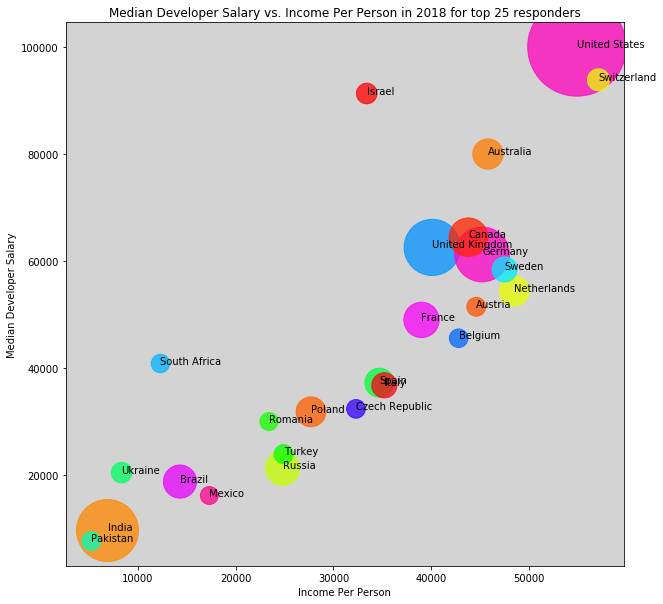

In [11]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
plt.scatter(income_data, salary_data, s=response_count_data, c=numpy.random.rand(25), alpha=.75, cmap=plt.get_cmap('hsv'));

for idx in range(0, 25):
    ax.annotate(country_data[idx], (income_data[idx], salary_data[idx]))
    
ax.patch.set_facecolor('lightgray')

plt.xlabel("Income Per Person")
plt.ylabel("Median Developer Salary")
plt.title("Median Developer Salary vs. Income Per Person in 2018 for top 25 responders");

As you create results that are worth keeping, you can write files to the "output" section of the Project. These changes will get versioned along with everything else. Be careful though, because writing too much data can bloat your project! For very large files, things you don't care about, or intermediate data products that are easily recomputed, you can write to the `untracked` directory in the "output" section. Files here are not versioned or synced

In [12]:
output_file = "../output/untracked/original_figure.png"

# save the figure in the untracked directory so it isn't versioned or synced
fig.savefig(output_file, bbox_inches='tight');

This plot is decent, but probably good be made better! Gigantum Client manages branches for you, so you can go off on a tangent and try things out without losing your work. A branch keeps everything verisoned together, including your code, data, and environment configuration. Try switching to the "improved-plot" branch to see some improved plotting using seaborn. To switch:

- Save any changes you want to keep in this notebook and close the JupyterLab tab
- Go back to the Gigantum Client tab
- Stop the container by clicking on the "Stop" button (the toggle in the top left corner)
- Click on the Branch dropdown and select "improved-colors"
- Click on "Launch JupyterLab" and jump into the updated code!